In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

Points=np.array([[2,4],[3,3],[3,4],[5,4],[5,6],[5,8],[6,4],[6,5],
                 [6,7],[7,3],[7,4],[8,2],[9,4],[10,6],[10,7],[10,8],[11,5]
                 ,[11,8],[12,7],[13,6],[13,7],[14,6],[15,4],[15,5]])

In [4]:
def kmeans(data,k):
  epoch=1

  number_of_rows=data.shape[0]
  random_indices = np.random.choice(number_of_rows, size=k, replace=False)
  random_rows = data[random_indices, :]
  class_cluster=np.zeros(len(data),dtype=np.uint8)
  random_rows.view('i8,i8').sort(order=['f1'], axis=0)

  while 1:
    for i in range(len(data)):
      euc_distance=[]
      for j in range(k):
          euc_distance.append(np.sqrt(np.sum([(data[i][0]-random_rows[j][0])**2,(data[i][1]-random_rows[j][1])**2])))
      class_cluster[i]=np.argmin(euc_distance)
    new1=[]
    New_Mean=[]
    for i in range(k):
        new1.append(np.argwhere(class_cluster==i).reshape(-1).tolist())  
        New_Mean.append(np.mean(data[new1[i]],axis=0).tolist())
  
    sum=0
    for i in range(k):
      sum=sum+np.sum([(New_Mean[i][0]-random_rows[i][0])**2,(New_Mean[i][1]-random_rows[i][1])**2])
    if sum==0:
      str1="k="+str(k)+"   "+"Epoches="+str(epoch)
      plt.title(str1)
      for i in range(k):
        plt.scatter(data[new1[i],0],data[new1[i],1],cmap='winter')
        plt.scatter(random_rows[i][0],random_rows[i][1],marker='^', linewidth=5)
        plt.annotate("M"+str(i),(random_rows[i][0],random_rows[i][1]))
        
      plt.grid()
      plt.show()
      
      return new1,random_rows;
    random_rows=New_Mean
    epoch+=1


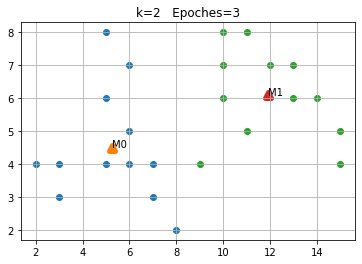

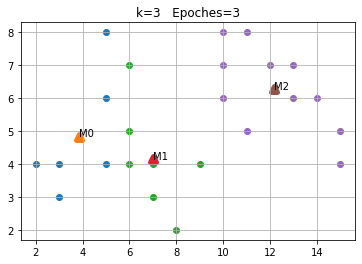

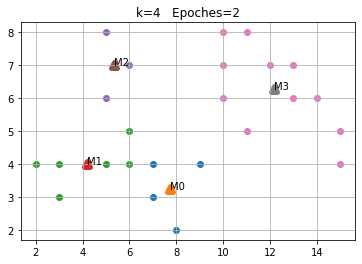

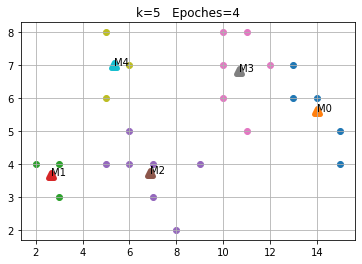

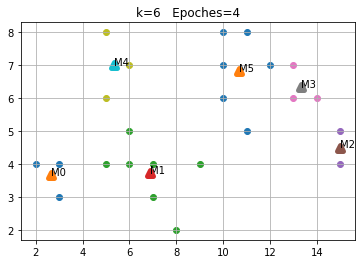

In [5]:
k=[2,3,4,5,6]
for i in k:
  kmeans(Points,i)